<a href="https://colab.research.google.com/github/gri11/superai/blob/main/aihack_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up Environment

In [ ]:
!pip install -Uqq fastai

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Datasets

In [ ]:
%%capture
!wget "https://raw.githubusercontent.com/HEKYPTO/Temp/main/train.csv?raw=True"
!wget "https://raw.githubusercontent.com/HEKYPTO/Temp/main/test.csv?raw=True"
!wget "https://raw.githubusercontent.com/HEKYPTO/Temp/main/submission_sample.csv?raw=True"

# Data Evaluation

In [ ]:
df = pd.read_csv("train.csv?raw=True")
pd.set_option('display.max_columns', None)
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,1,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,no
1,2,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,no
2,3,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,failure,no
3,4,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,unknown,no
4,5,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,unknown,no


In [ ]:
" ".join(list(df.columns))

'id age job marital education default balance housing loan contact month duration campaign pdays previous poutcome y'

In [ ]:
df.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.describe()

,id,age,balance,duration,campaign,pdays,previous
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,2000.000000,41.204551,1416.183796,261.906477,2.780695,39.365341,0.540385
std,1154.556192,10.580862,3017.975038,258.845954,3.083492,99.533237,1.651415
min,1.000000,19.000000,-2082.000000,4.000000,1.000000,-1.000000,0.000000
25%,1000.500000,33.000000,68.000000,104.000000,1.000000,-1.000000,0.000000
50%,2000.000000,39.000000,445.000000,184.000000,2.000000,-1.000000,0.000000
75%,2999.500000,49.000000,1470.000000,325.500000,3.000000,-1.000000,0.000000
max,3999.000000,87.000000,71188.000000,3025.000000,50.000000,871.000000,24.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3999 non-null   int64 
 1   age        3999 non-null   int64 
 2   job        3999 non-null   object
 3   marital    3999 non-null   object
 4   education  3999 non-null   object
 5   default    3999 non-null   object
 6   balance    3999 non-null   int64 
 7   housing    3999 non-null   object
 8   loan       3999 non-null   object
 9   contact    3999 non-null   object
 10  month      3999 non-null   object
 11  duration   3999 non-null   int64 
 12  campaign   3999 non-null   int64 
 13  pdays      3999 non-null   int64 
 14  previous   3999 non-null   int64 
 15  poutcome   3999 non-null   object
 16  y          3999 non-null   object
dtypes: int64(7), object(10)
memory usage: 531.2+ KB


In [ ]:
def heat_map_plt(dataset):
  plt.figure(figsize=(12, 9))
  sns.heatmap(dataset.corr(), annot=True, cmap="YlGnBu", linewidth=.7)

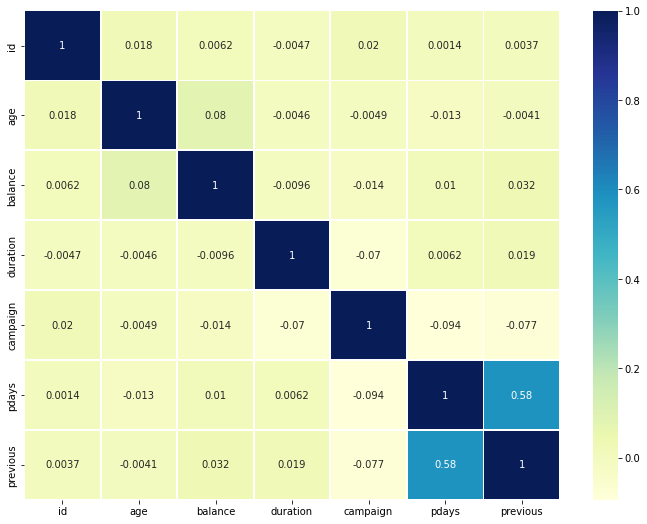

In [ ]:
heat_map_plt(df)

#Drop features and encoding features

In [ ]:
df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Dropped features
1. id - not so meaningful info
2. duration - should be discarded because we get this info after the result happenend.
3. job - too many of them
#### Maybe drop
  1. month - provide useful info?

### Encoded features
1. pdays - aware of meaning of numeric

  one-hot:
  *   contact



### TODO: Maybe drop outliner (stat101)




one-hot encoding

In [ ]:
onehot = ['contact']
pd.get_dummies(df[onehot]).head()

,contact_cellular,contact_telephone,contact_unknown
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1


In [ ]:
df = df.join(pd.get_dummies(df[onehot]))
df = df.drop(onehot, axis=1)

In [ ]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y,contact_cellular,contact_telephone,contact_unknown
0,1,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,no,1,0,0
1,2,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,no,1,0,0
2,3,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,failure,no,1,0,0
3,4,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,unknown,no,0,0,1
4,5,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,unknown,no,0,0,1


In [ ]:
#month_encoded
month_list = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
mapped_month = {month_list[i]: i for i in range(len(month_list))}
df["marital"].astype("category").cat.codes

#housing encoded


In [ ]:
df['month']

0       oct
1       may
2       apr
3       jun
4       may
       ... 
3994    nov
3995    apr
3996    may
3997    aug
3998    nov
Name: month, Length: 3999, dtype: object

In [ ]:
df[df['pdays'] == 999]

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y


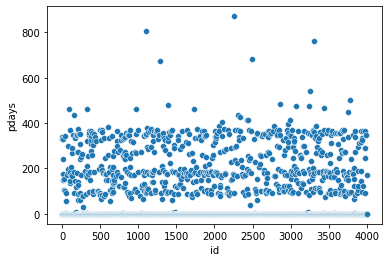

In [ ]:
sns.scatterplot(x=df['id'], y=df['pdays'])

In [ ]:
df['pdays'].value_counts()

-1      3281
 182      18
 183      13
 92       12
 363      11
        ... 
 210       1
 119       1
 375       1
 143       1
 123       1
Name: pdays, Length: 278, dtype: int64

In [ ]:
df['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [ ]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
#month_encoded
month_list = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
mapped_month = {month_list[i]: i for i in range(len(month_list))}

In [ ]:
df["marital"].astype("category").cat.codes

0       1
1       1
2       2
3       1
4       1
       ..
3994    1
3995    0
3996    1
3997    1
3998    1
Length: 3999, dtype: int8

# Model

## fastai model (deep learning)

In [ ]:
from fastai.tabular.all import *

In [ ]:
cat_names =  ['marital', 'education', 'default', 'housing', 
              'loan', 'contact', 'month', 'poutcome']
cont_names = ['age', 'balance', 'campaign', 'pdays', 'previous']

y_names = 'y'

splits = RandomSplitter(valid_pct=0.2)(range_of(df))

to = TabularPandas(df, procs=[Categorify, FillMissing, Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names=y_names,
                   splits=splits)

to.xs.iloc[:2]

,marital,education,default,housing,loan,contact,month,poutcome,age,balance,campaign,pdays,previous
1245,3,2,1,2,1,1,9,4,0.352857,-0.458250,-0.585242,-0.408792,-0.330341
970,2,1,1,2,1,1,2,1,1.574772,-0.133284,-0.585242,4.161507,0.281048


In [ ]:
dls = to.dataloaders(bs=64)

dls.show_batch()

,marital,education,default,housing,loan,contact,month,poutcome,age,balance,campaign,pdays,previous,y
0,married,secondary,no,yes,yes,unknown,may,unknown,33.0,803.999999,1.0,-1.000000,3.164621e-09,no
1,married,secondary,no,yes,yes,cellular,may,failure,40.0,166.999958,4.0,295.000005,1.000000e+00,no
2,married,secondary,no,yes,no,cellular,feb,unknown,53.0,482.999958,3.0,-1.000000,3.164621e-09,no
3,single,tertiary,no,no,no,cellular,jun,failure,30.0,1.999984,1.0,85.000001,1.000000e+00,no
4,single,tertiary,no,no,yes,cellular,nov,failure,46.0,45.999996,1.0,151.999998,1.000000e+00,no
5,single,secondary,no,no,yes,cellular,jul,unknown,32.0,116.000019,2.0,-1.000000,3.164621e-09,no
6,married,primary,no,yes,no,cellular,may,unknown,35.0,189.000011,1.0,-1.000000,3.164621e-09,no
7,married,tertiary,no,no,no,cellular,aug,other,50.0,2880.999991,2.0,2.000000,5.000000e+00,no
8,married,secondary,no,yes,no,unknown,jun,unknown,32.0,1464.000000,1.0,-1.000000,3.164621e-09,no
9,married,secondary,no,no,yes,cellular,jan,failure,56.0,2189.999996,2.0,231.999995,1.000000e+00,no


In [ ]:
learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.642717,0.641425,0.785982,00:00


In [ ]:
learn.show_results()

,marital,education,default,housing,loan,contact,month,poutcome,age,balance,campaign,pdays,previous,y,y_pred
0,3.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,-0.775064,-0.475252,-0.261737,-0.408792,-0.330341,0.0,0.0
1,3.0,3.0,1.0,1.0,1.0,1.0,7.0,4.0,-1.527011,-0.348217,-0.585242,-0.408792,-0.330341,1.0,0.0
2,2.0,2.0,1.0,1.0,1.0,1.0,6.0,4.0,1.010811,-0.743117,-0.585242,-0.408792,-0.330341,0.0,1.0
3,1.0,3.0,1.0,1.0,1.0,3.0,7.0,4.0,0.446851,-0.219899,-0.261737,-0.408792,-0.330341,0.0,0.0
4,2.0,2.0,1.0,1.0,1.0,2.0,12.0,4.0,2.608700,-0.219258,-0.585242,-0.408792,-0.330341,0.0,1.0
5,2.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0,0.070877,-0.207388,-0.585242,-0.408792,-0.330341,0.0,0.0
6,2.0,2.0,1.0,2.0,1.0,3.0,9.0,4.0,-0.681071,-0.559301,-0.261737,-0.408792,-0.330341,0.0,0.0
7,2.0,3.0,1.0,2.0,1.0,2.0,10.0,4.0,-0.117110,0.049890,-0.585242,-0.408792,-0.330341,0.0,0.0
8,2.0,4.0,1.0,2.0,1.0,1.0,7.0,3.0,1.104805,0.260332,-0.261737,3.409683,0.281048,1.0,1.0


## XGBoost, Random Forest
TODO: do more encoding for the model


## Logistic Regression

# Model Evaluation